# Homework 3 (Solution)

In [30]:
import kagglehub
import os
import pandas as pd
from sklearn.model_selection import train_test_split

## Download/Load dataset

In this homework, we will use the lead scoring dataset Bank Marketing dataset. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv).

In [31]:
path = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv"
df = pd.read_csv(path)
df

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1
...,...,...,...,...,...,...,...,...,...
1457,referral,manufacturing,1,NaN,self_employed,north_america,4,0.53,1
1458,referral,technology,3,65259.0,student,europe,2,0.24,1
1459,paid_ads,technology,1,45688.0,student,north_america,3,0.02,1
1460,referral,NaN,5,71016.0,self_employed,north_america,0,0.25,1


In this dataset our desired target for classification task will be `converted` variable - has the client signed up to the platform or not.

### Data preparation

* Check if the missing values are presented in the features.
* If there are missing values:
    * For categorical features, replace them with 'NA'
    * For numerical features, replace with with 0.0 

In [32]:
df.isna().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

### Strings

In [33]:
for col in df.select_dtypes(include=["object"]).columns:
    print(f"{col}: {df[col].nunique()} unique values")
    print(f"first 5: {df[col].unique()[:5]}")
    print()

lead_source: 5 unique values
first 5: ['paid_ads' 'social_media' 'events' 'referral' 'organic_search']

industry: 7 unique values
first 5: [nan 'retail' 'healthcare' 'education' 'manufacturing']

employment_status: 4 unique values
first 5: ['unemployed' 'employed' nan 'self_employed' 'student']

location: 7 unique values
first 5: ['south_america' 'australia' 'europe' 'africa' 'middle_east']



## Numbers

In [34]:
for col in df.select_dtypes(exclude=["object"]).columns:
    print(f"{col}: {df[col].nunique()} unique values")
    print(f"first 5: {df[col].unique()[:5]}")
    print()

number_of_courses_viewed: 10 unique values
first 5: [1 5 2 3 0]

annual_income: 1267 unique values
first 5: [79450. 46992. 78796. 83843. 85012.]

interaction_count: 12 unique values
first 5: [4 1 3 6 2]

lead_score: 101 unique values
first 5: [0.94 0.8  0.69 0.87 0.62]

converted: 2 unique values
first 5: [1 0]



### Categorical/numerical

In [35]:
categorical = df.select_dtypes(include=["object"]).columns.tolist()
numerical = df.select_dtypes(exclude=["object"]).columns.tolist()
numerical.remove("converted")

In [36]:
df[categorical] = df[categorical].fillna("NA")
df[numerical] = df[numerical].fillna(0.0)
df.isna().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

### Question 1

What is the most frequent observation (mode) for the column `industry`?

- `NA`
- `technology`
- `healthcare`
- `retail`

In [37]:
df.industry.value_counts()

industry
retail           203
finance          200
other            198
healthcare       187
education        187
technology       179
manufacturing    174
NA               134
Name: count, dtype: int64

In [38]:
df.industry.mode()[0]

'retail'

### Question 2

Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your dataset.
In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?

- `interaction_count` and `lead_score`
- `number_of_courses_viewed` and `lead_score`
- `number_of_courses_viewed` and `interaction_count`
- `annual_income` and `interaction_count`

Only consider the pairs above when answering this question.

In [39]:
df[numerical].corr()

,number_of_courses_viewed,annual_income,interaction_count,lead_score
number_of_courses_viewed,1.000000,0.009770,-0.023565,-0.004879
annual_income,0.009770,1.000000,0.027036,0.015610
interaction_count,-0.023565,0.027036,1.000000,0.009888
lead_score,-0.004879,0.015610,0.009888,1.000000


In [40]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# corr = df[numerical].corr(numeric_only=True)

# plt.figure(figsize=(10, 8))
# sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
# plt.title("Correlation Matrix")
# plt.show()

**Answer:** Anual_icome and interaction_count

### Split the data

- Split your data in train/val/test sets with 60%/20%/20% distribution.
- Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.
- Make sure that the target value `converted` is not in your dataframe.

In [41]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,1452,1453,1454,1455,1456,1457,1458,1459,1460,1461
lead_source,paid_ads,social_media,events,paid_ads,referral,events,social_media,social_media,referral,paid_ads,...,organic_search,paid_ads,referral,referral,social_media,referral,referral,paid_ads,referral,organic_search
industry,NA,retail,healthcare,retail,education,manufacturing,technology,NA,healthcare,other,...,retail,education,finance,finance,healthcare,manufacturing,technology,technology,NA,finance
number_of_courses_viewed,1,1,5,2,3,1,0,5,4,3,...,1,2,0,2,1,1,3,1,5,3
annual_income,79450.0,46992.0,78796.0,83843.0,85012.0,59904.0,51283.0,62975.0,38648.0,59866.0,...,49154.0,65742.0,75546.0,0.0,45253.0,0.0,65259.0,45688.0,71016.0,92855.0
employment_status,unemployed,employed,unemployed,NA,self_employed,NA,NA,student,unemployed,student,...,student,employed,NA,NA,NA,self_employed,student,student,self_employed,student
location,south_america,south_america,australia,australia,europe,africa,middle_east,europe,south_america,australia,...,africa,australia,asia,south_america,australia,north_america,europe,north_america,north_america,north_america
interaction_count,4,1,3,1,3,6,2,4,2,3,...,4,0,0,3,6,4,2,3,0,3
lead_score,0.94,0.8,0.69,0.87,0.62,0.83,0.57,0.62,0.86,0.43,...,0.37,0.57,0.1,0.47,0.24,0.53,0.24,0.02,0.25,0.41
converted,1,0,1,0,1,1,0,1,1,1,...,1,0,0,1,1,1,1,1,1,1


In [42]:
val_size = 0.2
test_size = 0.2
df_full_train,df_test = train_test_split(df, test_size=test_size, random_state=42)
df_train,df_val = train_test_split(df_full_train, test_size=val_size/(1-test_size), random_state=42)

In [43]:
len(df_train), len(df_val), len(df_test)

(876, 293, 293)


### Question 3

- Calculate the mutual information score between `converted` and other categorical variables in the dataset. Use the training set only.
- Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the biggest mutual information score?

- `industry`
- `location`
- `lead_source`
- `employment_status`

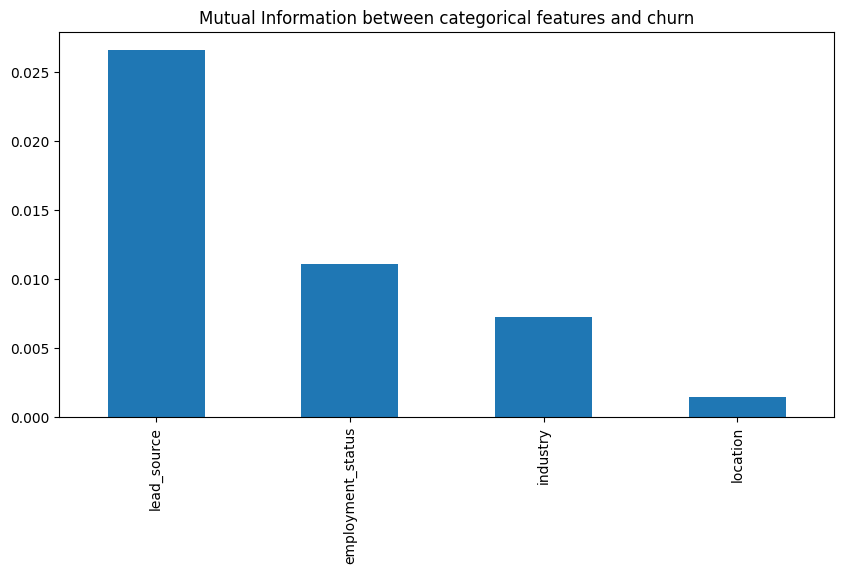

In [44]:
from sklearn.metrics import mutual_info_score

mi = df[categorical].apply(lambda c: mutual_info_score(df.converted,c))
mi.sort_values(ascending=False,inplace=True)
mi.plot.bar(figsize=(10,5),title="Mutual Information between categorical features and churn");

In [45]:
round(mi,2)

lead_source          0.03
employment_status    0.01
industry             0.01
location             0.00
dtype: float64

**Answer:** lead_source

### Question 4

- Now let's train a logistic regression.
- Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
- Fit the model on the training dataset.
  - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
  - `model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)`
- Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?
- 0.64
- 0.74
- 0.84
- 0.94

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
features = categorical + numerical

def prepare_X(df_tran,df_val):
    dicts_train=df_tran.to_dict(orient='records')
    dicts_val = df_val.to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(dicts_train)
    
    X_train = dv.transform(dicts_train)
    X_val = dv.transform(dicts_val)
    
    return X_train, X_val, dv

In [47]:
X_train, X_val, dv = prepare_X(df_train[features], df_val[features])

In [48]:
dv.get_feature_names_out()

array(['annual_income', 'employment_status=NA',
       'employment_status=employed', 'employment_status=self_employed',
       'employment_status=student', 'employment_status=unemployed',
       'industry=NA', 'industry=education', 'industry=finance',
       'industry=healthcare', 'industry=manufacturing', 'industry=other',
       'industry=retail', 'industry=technology', 'interaction_count',
       'lead_score', 'lead_source=NA', 'lead_source=events',
       'lead_source=organic_search', 'lead_source=paid_ads',
       'lead_source=referral', 'lead_source=social_media', 'location=NA',
       'location=africa', 'location=asia', 'location=australia',
       'location=europe', 'location=middle_east',
       'location=north_america', 'location=south_america',
       'number_of_courses_viewed'], dtype=object)

In [49]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1_000, random_state=42)
model.fit(X_train, df_train.converted)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [50]:
accuracy = model.score(X_val, df_val.converted)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.70


### Question 5

- Let's find the least useful feature using the _feature elimination_ technique.
- Train a model using the same features and parameters as in Q4 (without rounding).
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
- For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

Which of following feature has the smallest difference?

- `'industry'`
- `'employment_status'`
- `'lead_score'`

**Note**: The difference doesn't have to be positive.

In [51]:
X_train, X_val, dv = prepare_X(df_train[features], df_val[features])
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1_000)
model.fit(X_train, df_train.converted)
accuracy = model.score(X_val, df_val.converted)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.70


In [52]:
accuracies = {}
for feat in features:
    features_subset = [f for f in features if f != feat]
    
    X_train, X_val, dv = prepare_X(df_train[features_subset], df_val[features_subset])
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1_000, random_state=42)
    model.fit(X_train, df_train.converted)
    accuracy = model.score(X_val, df_val.converted)
    accuracies[f"no {feat}"] = accuracy
    print(f"Accuracy without '{feat}': {accuracy}")

Accuracy without 'lead_source': 0.7030716723549488
Accuracy without 'industry': 0.6996587030716723
Accuracy without 'employment_status': 0.6962457337883959
Accuracy without 'location': 0.7098976109215017
Accuracy without 'number_of_courses_viewed': 0.5563139931740614
Accuracy without 'annual_income': 0.8532423208191127
Accuracy without 'interaction_count': 0.5563139931740614
Accuracy without 'lead_score': 0.7064846416382252


In [53]:
diff = {k: accuracy - v for k, v in accuracies.items()}
sorted_dict = dict(sorted(diff.items(), key=lambda x: x[1]))
sorted_dict

{'no annual_income': -0.14675767918088745,
 'no location': -0.0034129692832765013,
 'no lead_score': 0.0,
 'no lead_source': 0.0034129692832763903,
 'no industry': 0.0068259385665528916,
 'no employment_status': 0.010238907849829282,
 'no number_of_courses_viewed': 0.15017064846416384,
 'no interaction_count': 0.15017064846416384}

**Answer:** 1-annual_income 2-lead_source

### Question 6

- Now let's train a regularized logistic regression.
- Let's try the following values of the parameter `C`: `[0.01, 0.1, 1, 10, 100]`.
- Train models using all the features as in Q4.
- Calculate the accuracy on the validation dataset and round it to 3 decimal digits.

Which of these `C` leads to the best accuracy on the validation set?

- 0.01
- 0.1
- 1
- 10
- 100

> **Note**: If there are multiple options, select the smallest `C`.

In [54]:
X_train, X_val, dv = prepare_X(df_train[features], df_val[features])
for c in [0.01, 0.1, 1.0, 10.0,100]:
    model = LogisticRegression(solver='liblinear', C=c, max_iter=1_000, random_state=42)
    model.fit(X_train, df_train.converted)
    accuracy = model.score(X_val, df_val.converted)
    print(f"C={c}: Accuracy: {accuracy}")


C=0.01: Accuracy: 0.6996587030716723
C=0.1: Accuracy: 0.6996587030716723
C=1.0: Accuracy: 0.6996587030716723
C=10.0: Accuracy: 0.6996587030716723
C=100: Accuracy: 0.6996587030716723


**Answer:** $c=0.01$.